In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL0xlbm92by9EZXNrdG9wL3BmamF4L2RvY3M='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.

In [2]:
# jax
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import jax.random
from functools import partial
# plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import projplot as pjp
# pfjax
import pfjax as pf
from pfjax.models import BMModel
# stochastic optimization
import optax

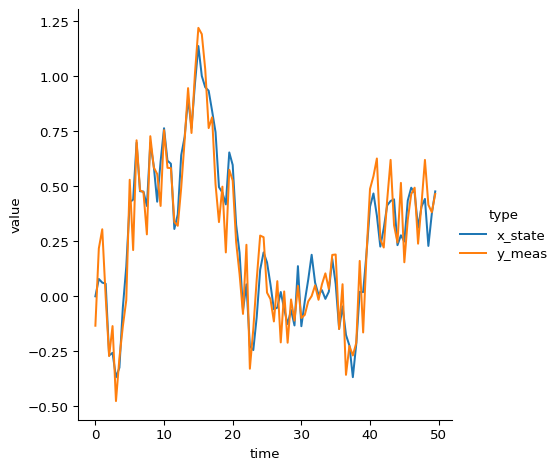

In [3]:
# parameter values
mu = 0.
sigma = .2
tau = .1
theta_true = jnp.array([mu, sigma, tau])

# data specification
dt = .5
n_obs = 100
x_init = jnp.array(0.)

# initial key for random numbers
key = jax.random.PRNGKey(0)

# simulate data
bm_model = BMModel(dt=dt)
key, subkey = jax.random.split(key)
y_meas, x_state = pf.simulate(
    model=bm_model,
    key=subkey,
    n_obs=n_obs,
    x_init=x_init,
    theta=theta_true
)

# plot data
plot_df = (pd.DataFrame({"time": jnp.arange(n_obs) * dt,
                         "x_state": jnp.squeeze(x_state),
                         "y_meas": jnp.squeeze(y_meas)})
           .melt(id_vars="time", var_name="type"))
sns.relplot(
    data=plot_df, kind="line",
    x="time", y="value", hue="type"
)

In [4]:
def pf_stochopt(model, key, theta, y_meas, n_particles,
                learning_rate, n_steps):
    """
    Stochastic optimization using Adam.

    Args:
        model: A particle filter model object.
        key: PRNG key.
        theta: Initial parameter value.
        y_meas: JAX array with leading dimension `n_obs` containing the measurement variables 
                `y_meas = (y_0, ..., y_T)`, where `T = n_obs-1`.        
        n_particles: The number of particles to use in the particle filter.
        learning_rate: Optimizer learning rate.
        n_steps: Number of optimizer steps.

    Returns:
        theta: Parameter value at last step.
        loglik: JAX array of length `n_steps` containing a stochastic estimate of the loglikelihood at each step.
    """
    # set up and initialize the optimizer
    optimizer = optax.adam(learning_rate=learning_rate)
    opt_state = optimizer.init(params=theta)

    # optimizer step function
    @jax.jit
    def step(theta, key, opt_state):
        pf_out = pf.particle_filter_rb(
            model=model,
            key=key,
            y_meas=y_meas,
            n_particles=n_particles,
            theta=theta,
            history=False,
            score=True,
            fisher=False
        )
        opt_updates, opt_state = optimizer.update(
            updates=-1.0 * pf_out["score"], # optax assumes a minimization problem
            state=opt_state, 
            params=theta
        )
        theta = optax.apply_updates(params=theta, updates=opt_updates)
        return theta, opt_state, pf_out["loglik"]

    # optimizer loop
    subkeys = jax.random.split(key, n_steps)
    loglik_out = jnp.zeros((n_steps,))
    for i in jnp.arange(n_steps):
        theta, opt_state, loglik = step(theta=theta, key=subkeys[i], opt_state=opt_state)
        loglik_out = loglik_out.at[i].set(loglik)
        
    return theta, loglik_out

{'theta_opt': Array([0.01, 0.19, 0.13], dtype=float32),
 'theta_true': Array([0. , 0.2, 0.1], dtype=float32)}

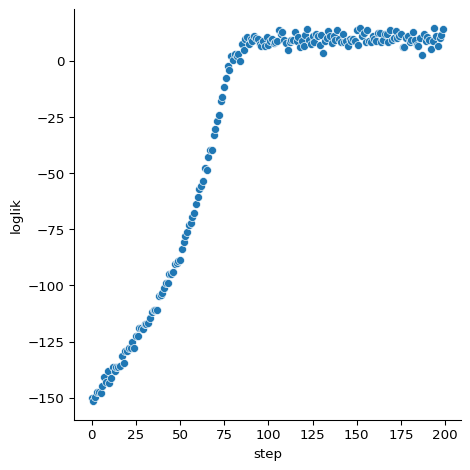

In [5]:
# optimization setup
theta_init = jnp.array([1., 1., 1.])
n_particles = 50
learning_rate = 0.01
n_steps = 200

theta_opt, loglik = pf_stochopt(
    model=bm_model,
    key=key,
    theta=theta_init,
    y_meas=y_meas,
    n_particles=n_particles,
    learning_rate=learning_rate,
    n_steps=n_steps
)

# plot loglikelihood as a function of step count
sns.relplot(
    data = {"step": jnp.arange(n_steps), "loglik": loglik},
    x = "step",
    y = "loglik"
)

# estimated and true parameter values
{"theta_opt": jnp.round(theta_opt, decimals=2), "theta_true": theta_true}

In [6]:
@partial(jax.jit, static_argnums=(0, 4))
def pf_varest(model, key, theta, y_meas, n_particles):
    """
    Variance estimation for stochastic optimization.

    Args:
        model: A particle filter model object.
        key: PRNG key.
        theta: Initial parameter value.
        y_meas: JAX array with leading dimension `n_obs` containing the measurement variables 
                `y_meas = (y_0, ..., y_T)`, where `T = n_obs-1`.        
        n_particles: The number of particles to use in the particle filter.

    Returns:
        varest: Variance estimate.
    """

    pf_out = pf.particle_filter_rb(
        model=model,
        key=key,
        y_meas=y_meas,
        n_particles=n_particles,
        theta=theta,
        history=False,
        score=True,
        fisher=True
    )
    return jnp.linalg.inv(pf_out["fisher"])

# calculate the variance estimate
n_particles = 100 # increase this a bit since the calculation only needs to be done once

theta_ve = pf_varest(
    model=bm_model,
    key=key,
    theta=theta_opt,
    y_meas=y_meas,
    n_particles=n_particles
)

theta_ve

Array([[ 7.3080492e-04,  1.1083304e-06,  3.2907776e-06],
       [ 1.1083516e-06,  8.4179023e-04, -2.6923112e-04],
       [ 3.2907708e-06, -2.6923110e-04,  3.5276197e-04]], dtype=float32)

In [7]:
np.linalg.eigvalsh(theta_ve)

array([0.00023356, 0.00073083, 0.00096097], dtype=float32)